# نلاحظ ان استخدام مجموعة البيانات كاملة لاتعطي نتيجة جيدة اتناء البحث عن القيمة المثلي لمعامل   
# K
# باستخدام   Kfold, Stratfied
# لانه بالمنطق كروس فاليديت هي لي بتقسم مجموعة البيانات كاملة 
# بمعني انه اذا اعطينا كروس قاليديت مجموعة البيانات مقسمة , هذا عكس شغلها

# من هنا سيتم اعتماد طريقة 
# leavouoneout 
# لمجموعة البيانات كاملة
# كانت القيمة الاوبتمل 
# K=20 or 15
# وكان افضل متوسط دقة 
# 0.952 
# افضل دقة هي بمتابة تروشود

In [1]:
# sensitivity analysis of k in k-fold cross-validation
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


In [2]:
BC = pd.read_csv('bc_97.csv')

In [3]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.4,10.0,20.0,10.0,...,3.4,4.60,13.4,196.0,14.0,150.0,145.0,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,NaN,9.3,11.0,17.0,...,4.4,5.00,12.5,155.0,NaN,260.0,139.2,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.5,8.5,13.0,10.0,...,5.1,4.46,13.8,312.0,NaN,169.0,140.0,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.2,8.0,7.0,13.0,...,3.1,4.33,10.7,212.0,10.0,138.0,136.4,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.0,NaN,9.0,15.0,...,4.2,4.13,12.3,243.0,5.0,154.0,NaN,4.00,106.2,0


In [4]:
BC.shape

(2435, 23)

<a id = "6"></a><br>
## Missing Values

In [5]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## outlires by Z-score


In [6]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [7]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [8]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [9]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [10]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          32
Urea         11
Creatinin    30
ALB           4
TCa          27
GPT           4
GOT           5
ALP          32
CA15          1
CEA           1
WBC           0
RBC          11
HGB           0
PLT           0
ESR          58
LDH          18
Na           13
K             7
CL           64
CLASS         0
dtype: int64

In [11]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


# LabelEncoder for object featurs

In [12]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])

In [13]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,19,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,19,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,17,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,17,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,19,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,19,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,19,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


##  find K- cross validation


# باستخدام مجموعة الاختبار هي التي سيتم تقسيمها من قبل 
# Kfold

In [15]:
#استخدام افضل محموعة فرعية من التجارب السابقة

x = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values


In [16]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=101) 


## StandardScaler

In [17]:

from sklearn.preprocessing import StandardScaler


std = StandardScaler()
X_std_train = std.fit_transform(X_train)
X_std_test = std.fit_transform(X_test)



In [18]:
# create the dataset

def get_dataset():
    x=X_std_test
    y=y_test
    
    return x, y

In [19]:
# retrieve the model to be evaluate

def get_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_std_train,y_train) 
    return model

In [20]:

# evaluate the model using a given test condition
def evaluate_model(cv):
    
    # get the dataset
    X, y = get_dataset()

    #get the model
    model = get_model()
    
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # return scores
    return np.mean(scores), scores.min(), scores.max()


In [21]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>> LeaveOneOut

In [22]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)


Ideal: 0.941


In [23]:
# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.962 (0.957,0.967)
> folds=3, accuracy=0.949 (0.936,0.961)
> folds=4, accuracy=0.952 (0.947,0.954)
> folds=5, accuracy=0.939 (0.917,0.959)
> folds=6, accuracy=0.936 (0.901,0.980)
> folds=7, accuracy=0.939 (0.897,0.966)
> folds=8, accuracy=0.947 (0.908,0.987)
> folds=9, accuracy=0.937 (0.881,0.971)
> folds=10, accuracy=0.929 (0.883,0.984)
> folds=11, accuracy=0.934 (0.873,0.982)
> folds=12, accuracy=0.937 (0.860,1.000)
> folds=13, accuracy=0.931 (0.826,1.000)
> folds=14, accuracy=0.931 (0.837,1.000)
> folds=15, accuracy=0.931 (0.850,1.000)
> folds=16, accuracy=0.934 (0.842,1.000)
> folds=17, accuracy=0.936 (0.857,1.000)
> folds=18, accuracy=0.939 (0.848,1.000)
> folds=19, accuracy=0.933 (0.875,1.000)
> folds=20, accuracy=0.934 (0.800,1.000)
> folds=21, accuracy=0.946 (0.862,1.000)
> folds=22, accuracy=0.942 (0.821,1.000)
> folds=23, accuracy=0.932 (0.769,1.000)
> folds=24, accuracy=0.937 (0.800,1.000)
> folds=25, accuracy=0.938 (0.792,1.000)
> folds=26, accuracy=0.9

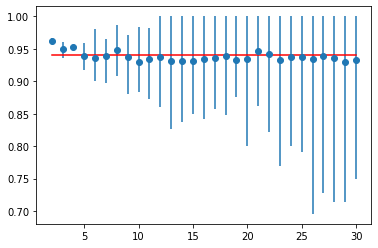

In [24]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()

In [25]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>>KFold

In [26]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(KFold())
print('Ideal: %.3f' % ideal)


Ideal: 0.936


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [27]:

# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.962 (0.957,0.967)
> folds=3, accuracy=0.949 (0.936,0.961)
> folds=4, accuracy=0.952 (0.947,0.954)
> folds=5, accuracy=0.939 (0.917,0.959)
> folds=6, accuracy=0.936 (0.901,0.980)
> folds=7, accuracy=0.939 (0.897,0.966)
> folds=8, accuracy=0.947 (0.908,0.987)
> folds=9, accuracy=0.937 (0.881,0.971)
> folds=10, accuracy=0.929 (0.883,0.984)
> folds=11, accuracy=0.934 (0.873,0.982)
> folds=12, accuracy=0.937 (0.860,1.000)
> folds=13, accuracy=0.931 (0.826,1.000)
> folds=14, accuracy=0.931 (0.837,1.000)
> folds=15, accuracy=0.931 (0.850,1.000)
> folds=16, accuracy=0.934 (0.842,1.000)
> folds=17, accuracy=0.936 (0.857,1.000)
> folds=18, accuracy=0.939 (0.848,1.000)
> folds=19, accuracy=0.933 (0.875,1.000)
> folds=20, accuracy=0.934 (0.800,1.000)
> folds=21, accuracy=0.946 (0.862,1.000)
> folds=22, accuracy=0.942 (0.821,1.000)
> folds=23, accuracy=0.932 (0.769,1.000)
> folds=24, accuracy=0.937 (0.800,1.000)
> folds=25, accuracy=0.938 (0.792,1.000)
> folds=26, accuracy=0.9

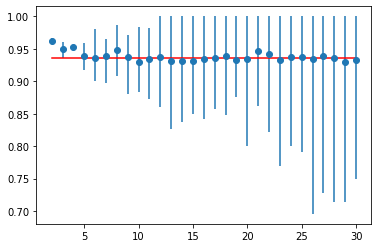

In [28]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()

In [29]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>> StratifiedKFold

In [30]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(StratifiedKFold())
print('Ideal: %.3f' % ideal)


Ideal: 0.933


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [31]:

# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.962 (0.957,0.967)
> folds=3, accuracy=0.949 (0.936,0.961)
> folds=4, accuracy=0.952 (0.947,0.954)
> folds=5, accuracy=0.939 (0.917,0.959)
> folds=6, accuracy=0.936 (0.901,0.980)
> folds=7, accuracy=0.939 (0.897,0.966)
> folds=8, accuracy=0.947 (0.908,0.987)
> folds=9, accuracy=0.937 (0.881,0.971)
> folds=10, accuracy=0.929 (0.883,0.984)
> folds=11, accuracy=0.934 (0.873,0.982)
> folds=12, accuracy=0.937 (0.860,1.000)
> folds=13, accuracy=0.931 (0.826,1.000)
> folds=14, accuracy=0.931 (0.837,1.000)
> folds=15, accuracy=0.931 (0.850,1.000)
> folds=16, accuracy=0.934 (0.842,1.000)
> folds=17, accuracy=0.936 (0.857,1.000)
> folds=18, accuracy=0.939 (0.848,1.000)
> folds=19, accuracy=0.933 (0.875,1.000)
> folds=20, accuracy=0.934 (0.800,1.000)
> folds=21, accuracy=0.946 (0.862,1.000)
> folds=22, accuracy=0.942 (0.821,1.000)
> folds=23, accuracy=0.932 (0.769,1.000)
> folds=24, accuracy=0.937 (0.800,1.000)
> folds=25, accuracy=0.938 (0.792,1.000)
> folds=26, accuracy=0.9

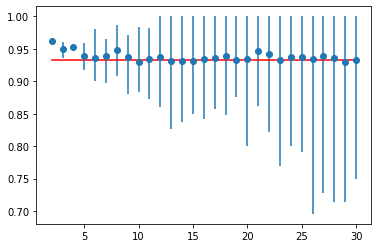

In [32]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()

##  find K- cross validation


# باستخدام مجموعة البيانات كاملة هي التي سيتم تقسيمها من قبل 
# Kfold

In [34]:
#استخدام افضل محموعة فرعية من التجارب السابقة

x = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values


In [35]:
## StandardScaler

from sklearn.preprocessing import StandardScaler


std = StandardScaler()
X_std = std.fit_transform(x)



In [36]:
# create the dataset

def get_dataset():
    return X_std, y

In [37]:
# retrieve the model to be evaluate

def get_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state=0)
    return model

In [38]:

# evaluate the model using a given test condition
def evaluate_model(cv):
    
    # get the dataset
    X, y = get_dataset()

    #get the model
    model = get_model()
    
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # return scores
    return np.mean(scores), scores.min(), scores.max()


In [39]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>> LeaveOneOut

In [40]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)


Ideal: 0.952


In [41]:
# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.949 (0.944,0.953)
> folds=3, accuracy=0.947 (0.940,0.954)
> folds=4, accuracy=0.947 (0.946,0.949)
> folds=5, accuracy=0.952 (0.945,0.963)
> folds=6, accuracy=0.950 (0.933,0.965)
> folds=7, accuracy=0.948 (0.934,0.968)
> folds=8, accuracy=0.951 (0.938,0.967)
> folds=9, accuracy=0.951 (0.941,0.974)
> folds=10, accuracy=0.949 (0.934,0.963)
> folds=11, accuracy=0.956 (0.937,0.973)
> folds=12, accuracy=0.952 (0.936,0.970)
> folds=13, accuracy=0.955 (0.925,0.984)
> folds=14, accuracy=0.954 (0.931,0.989)
> folds=15, accuracy=0.953 (0.932,0.994)
> folds=16, accuracy=0.954 (0.928,0.980)
> folds=17, accuracy=0.953 (0.930,0.972)
> folds=18, accuracy=0.954 (0.941,1.000)
> folds=19, accuracy=0.954 (0.922,0.992)
> folds=20, accuracy=0.952 (0.934,0.992)
> folds=21, accuracy=0.953 (0.922,0.991)
> folds=22, accuracy=0.952 (0.928,0.991)
> folds=23, accuracy=0.954 (0.925,1.000)
> folds=24, accuracy=0.954 (0.921,1.000)
> folds=25, accuracy=0.953 (0.928,0.990)
> folds=26, accuracy=0.9

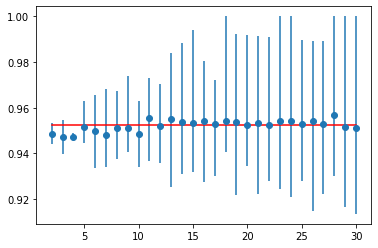

In [42]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()

In [43]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>>KFold

In [44]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(KFold())
print('Ideal: %.3f' % ideal)


Ideal: 0.917


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [45]:





# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.949 (0.944,0.953)
> folds=3, accuracy=0.947 (0.940,0.954)
> folds=4, accuracy=0.947 (0.946,0.949)
> folds=5, accuracy=0.952 (0.945,0.963)
> folds=6, accuracy=0.950 (0.933,0.965)
> folds=7, accuracy=0.948 (0.934,0.968)
> folds=8, accuracy=0.951 (0.938,0.967)
> folds=9, accuracy=0.951 (0.941,0.974)
> folds=10, accuracy=0.949 (0.934,0.963)
> folds=11, accuracy=0.956 (0.937,0.973)
> folds=12, accuracy=0.952 (0.936,0.970)
> folds=13, accuracy=0.955 (0.925,0.984)
> folds=14, accuracy=0.954 (0.931,0.989)
> folds=15, accuracy=0.953 (0.932,0.994)
> folds=16, accuracy=0.954 (0.928,0.980)
> folds=17, accuracy=0.953 (0.930,0.972)
> folds=18, accuracy=0.954 (0.941,1.000)
> folds=19, accuracy=0.954 (0.922,0.992)
> folds=20, accuracy=0.952 (0.934,0.992)
> folds=21, accuracy=0.953 (0.922,0.991)
> folds=22, accuracy=0.952 (0.928,0.991)
> folds=23, accuracy=0.954 (0.925,1.000)
> folds=24, accuracy=0.954 (0.921,1.000)
> folds=25, accuracy=0.953 (0.928,0.990)
> folds=26, accuracy=0.9

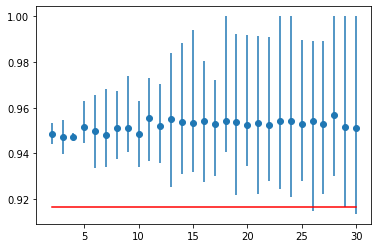

In [46]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()

In [47]:
# القيمة المثلي للدقة وعليك تحديد ما يقابلها من قيمة 
# K >>>>> by >>>> StratifiedKFold

In [48]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(StratifiedKFold())
print('Ideal: %.3f' % ideal)


Ideal: 0.905


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [49]:

# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)

    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    
    # store mean accuracy
    means.append(k_mean)
    
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    


> folds=2, accuracy=0.949 (0.944,0.953)
> folds=3, accuracy=0.947 (0.940,0.954)
> folds=4, accuracy=0.947 (0.946,0.949)
> folds=5, accuracy=0.952 (0.945,0.963)
> folds=6, accuracy=0.950 (0.933,0.965)
> folds=7, accuracy=0.948 (0.934,0.968)
> folds=8, accuracy=0.951 (0.938,0.967)
> folds=9, accuracy=0.951 (0.941,0.974)
> folds=10, accuracy=0.949 (0.934,0.963)
> folds=11, accuracy=0.956 (0.937,0.973)
> folds=12, accuracy=0.952 (0.936,0.970)
> folds=13, accuracy=0.955 (0.925,0.984)
> folds=14, accuracy=0.954 (0.931,0.989)
> folds=15, accuracy=0.953 (0.932,0.994)
> folds=16, accuracy=0.954 (0.928,0.980)
> folds=17, accuracy=0.953 (0.930,0.972)
> folds=18, accuracy=0.954 (0.941,1.000)
> folds=19, accuracy=0.954 (0.922,0.992)
> folds=20, accuracy=0.952 (0.934,0.992)
> folds=21, accuracy=0.953 (0.922,0.991)
> folds=22, accuracy=0.952 (0.928,0.991)
> folds=23, accuracy=0.954 (0.925,1.000)
> folds=24, accuracy=0.954 (0.921,1.000)
> folds=25, accuracy=0.953 (0.928,0.990)
> folds=26, accuracy=0.9

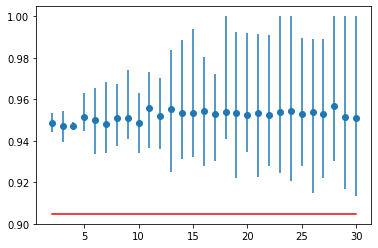

In [50]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()